In [1]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns



In [2]:
#Creating synthetic data for k clusters
def create_data(k=3,num_points_per_cluster=30,x_c=5,y_c=5,scale_x=3,scale_y=3,seed=42,x_dist=5,y_dist=5):
    np.random.seed(seed)
    xs =[]
    ys =[]
    for i in range(0,k):
        xs.extend([i for i in np.random.random(num_points_per_cluster)*scale_x+x_c+i*x_dist])
        ys.extend([i for i in np.random.random(num_points_per_cluster)*scale_y+y_c+(i%2)*y_dist]) 
    mydf = pd.DataFrame({'x':xs,'y':ys})
    sns.scatterplot('x','y',data=mydf)
    plt.show()
    return mydf




In [3]:
def kmeans_2d(k,points,iterations):
    #initalize points
#    log =collections.defaultdict(list)
#    initial_point_indices = [i for i in range(0,k)]
    initial_point_indices = [i for i in np.random.randint(low=0,high=len(points),size=k)]
    #Store cluster locations in dictionary
    initial_points =collections.defaultdict(list)
    for i in range(0,k):
        initial_points[i].append(points.iloc[initial_point_indices[i]]['x'])
        initial_points[i].append(points.iloc[initial_point_indices[i]]['y'])
    #Repeat below steps according to number of iterations
    #Assign points according to current cluster centroids
    #New cluster centroids are computed based on location means of points that belong to a cluster 
    wcss_list = pd.DataFrame({'iteration':[i+1 for i in range(0,iterations)],'wcss':[None for i in range(0,iterations)]})
    for j in range(0,iterations):
        #assign all points to closest cluster by distance
        for i in range(0,k):
            points['dist_from_'+str(i)+'th cluster'] = ((points['x']-initial_points[i][0])**2 + (points['y']-initial_points[i][1])**2)**.5
        points['nearest_cluster'] = np.argmin(points.iloc[:,2:2+k].values,axis=1)
        #plot current cluster and points assigned to it 
        sns.scatterplot('x','y',data=points,hue='nearest_cluster',palette='tab10')
        for i in range(0,k):
            plt.plot(initial_points[i][0], initial_points[i][1], marker="+", markersize=20, markeredgecolor="red", markerfacecolor="green")
        plt.title('Iteration :'+str(j+1)+' Points assigned')
        plt.show()
        #calculate wcss for current cluster centroids
        wcss = 0
        for i in range(0,k):
            wcss += points.loc[points['nearest_cluster']==i].iloc[:,2+i].mean()
        average_wcss = wcss/k
        wcss_list.iloc[j,1] = average_wcss
#        log[j].append(points.copy())
#        log[j].append(average_wcss)

        #compute new cluster centroids
        new_means = points.groupby('nearest_cluster').agg({'x':np.mean,'y':np.mean}).reset_index()
        initial_points =collections.defaultdict(list)
        #print(new_means)
        #print(initial_points)
        for i in range(0,k):
            initial_points[i].append(new_means.loc[new_means['nearest_cluster']==i]['x'].values[0])
            initial_points[i].append(new_means.loc[new_means['nearest_cluster']==i]['y'].values[0])

        #plot new cluster centroids
        sns.scatterplot('x','y',data=points,hue='nearest_cluster',palette='tab10')
        for i in range(0,k):
            plt.plot(initial_points[i][0], initial_points[i][1], marker="+", markersize=20, markeredgecolor="red", markerfacecolor="green")
        plt.title('Iteration :'+str(j+1)+' New centers computed')
        plt.show()
    sns.lineplot(x='iteration',y='wcss',data=wcss_list,marker='o')
#    print(wcss_list)




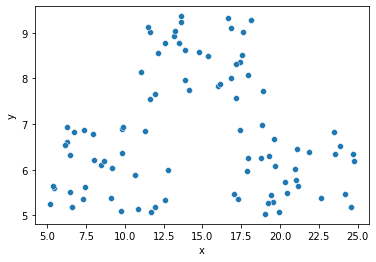

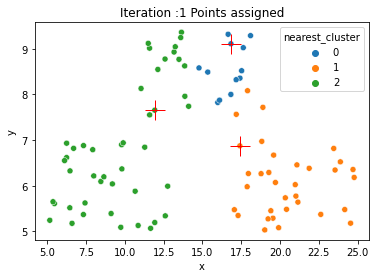

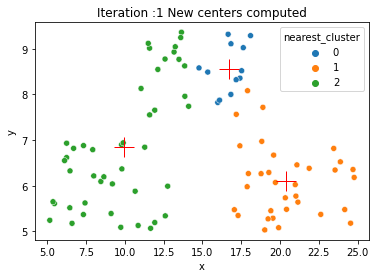

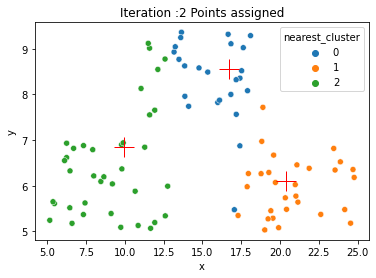

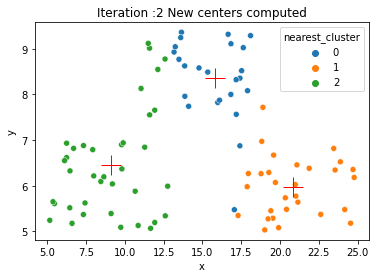

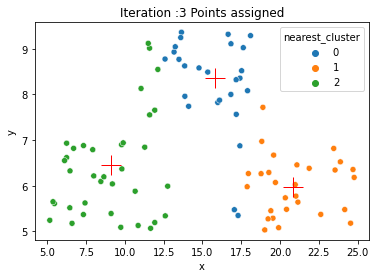

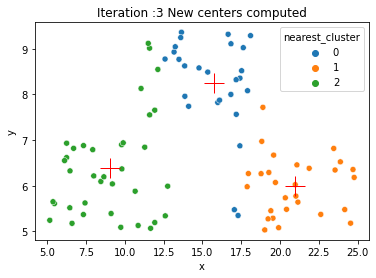

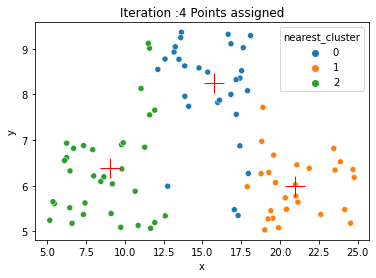

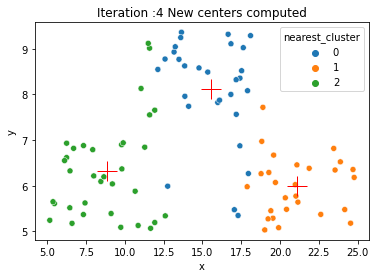

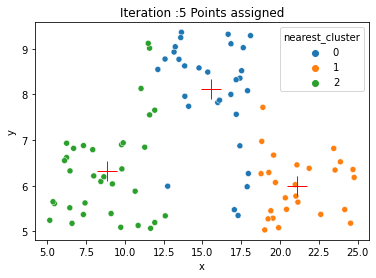

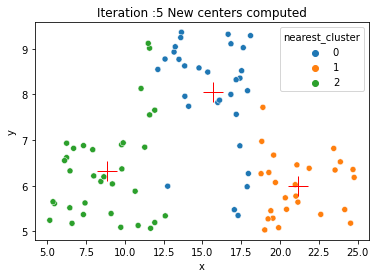

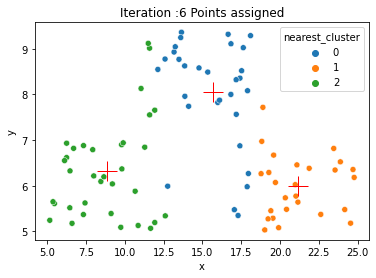

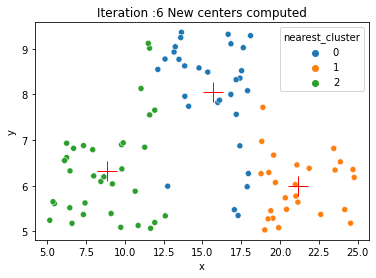

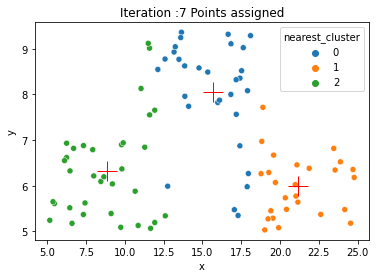

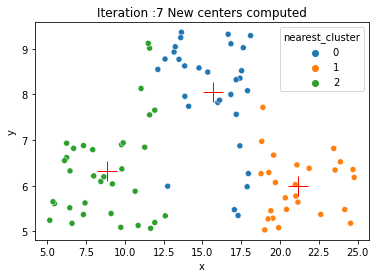

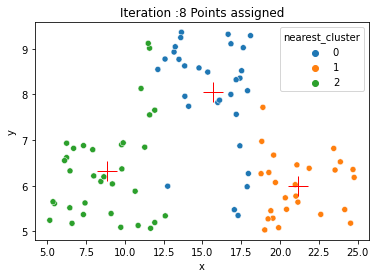

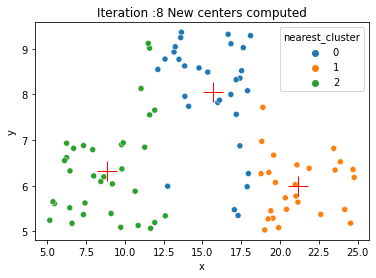

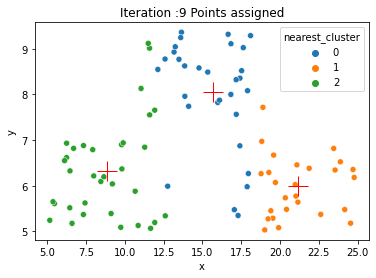

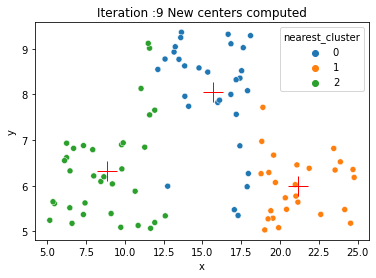

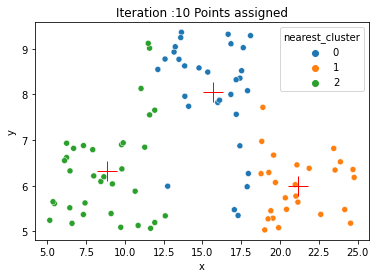

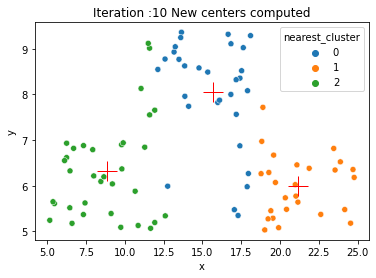

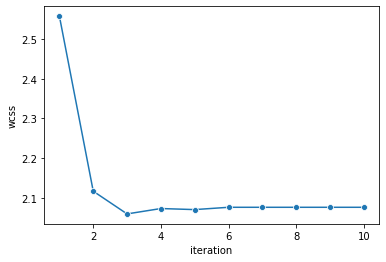

In [4]:
points = create_data(k=3,scale_y=2,scale_x=8,x_dist=6,y_dist=2.5)
kmeans_2d(k=3,points=points,iterations=10)

